In [51]:
from statistics import correlation

import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3

from PIL.ImagePalette import wedge
from matplotlib.pyplot import subplot
from scipy.stats import ttest_ind
import scipy.stats as stats
from setuptools.monkey import patch_all

warnings.filterwarnings('ignore')

# Loading the dataset


In [52]:
#creating database connection
conn = sqlite3.connect('inventory.db')

# fetching vendor summary data
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)
df.head()


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,580320,15245006.40,148408.0,5330779.92,717770.82,272682.92,68601.68,-9914226.48,-185.980788,0.255735,0.349674
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,656152,15216164.88,166398.0,5003541.98,597860.25,305740.15,144929.24,-10212622.90,-204.107869,0.253597,0.328831
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,749628,13673214.72,194305.0,4723542.95,494524.25,357018.51,123780.22,-8949671.77,-189.469470,0.259202,0.345460
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,806728,13044791.76,213765.0,4769605.35,450967.95,392777.83,257032.07,-8275186.41,-173.498346,0.264978,0.365633
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,552436,12092824.04,144307.0,4478044.93,582816.01,265148.74,257032.07,-7614779.11,-170.046956,0.261219,0.370306


# Exploratory Data Analysis
- Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.

- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.

In [53]:
# Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,21384.0,1.065065e+04,18753.080628,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,21384.0,1.803923e+04,12661.890990,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,21384.0,2.438530e+01,109.266819,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,21384.0,3.564367e+01,148.242550,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,21384.0,8.473605e+02,664.293678,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,21384.0,1.256355e+04,44379.309314,4.00,144.000000,1048.000000,7903.000000,1.350640e+06
TotalPurchaseDollars,21384.0,1.204268e+05,492259.687566,2.84,1813.830000,14621.860000,82952.980000,1.524501e+07
TotalSalesQuantity,21384.0,3.262704e+03,11620.572239,0.00,36.000000,279.000000,2038.250000,3.624600e+05
TotalSalesDollars,21384.0,4.473362e+04,177009.944692,0.00,790.860000,5670.580000,30147.035000,5.428709e+06
TotalSalesPrice,21384.0,2.001560e+04,48024.317643,0.00,311.880000,3038.700000,17018.392500,7.344342e+05


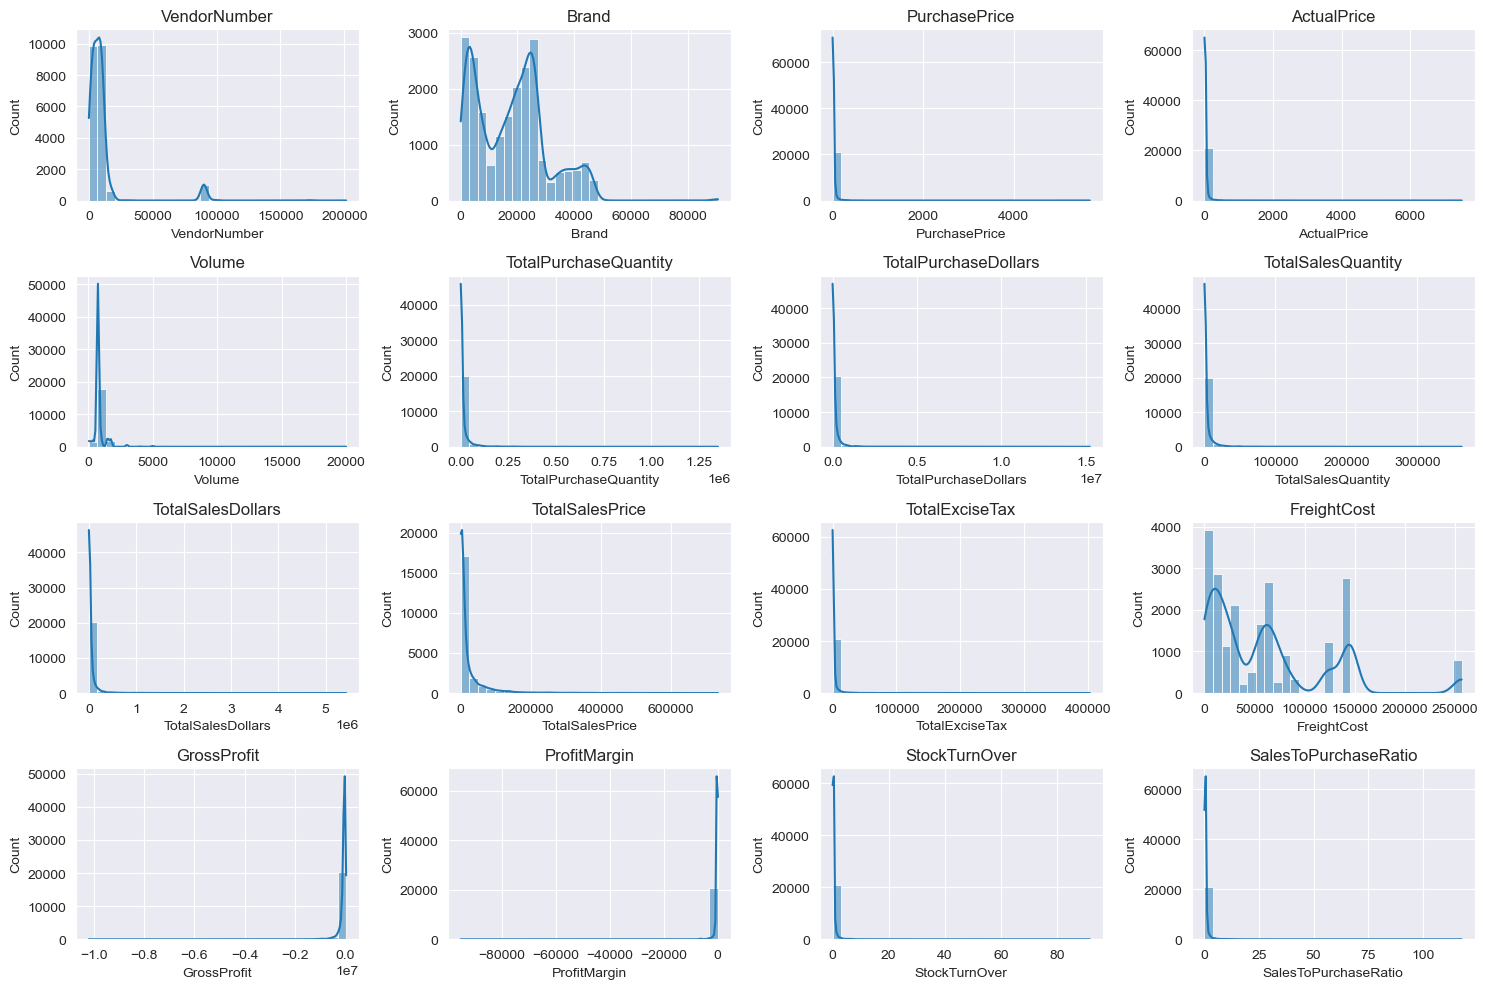

In [54]:
#Distribution plots for Numerical Columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15,10))
for i , col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)#Adjust grid layout as needed
    sns.histplot(df[col],bins=30,kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

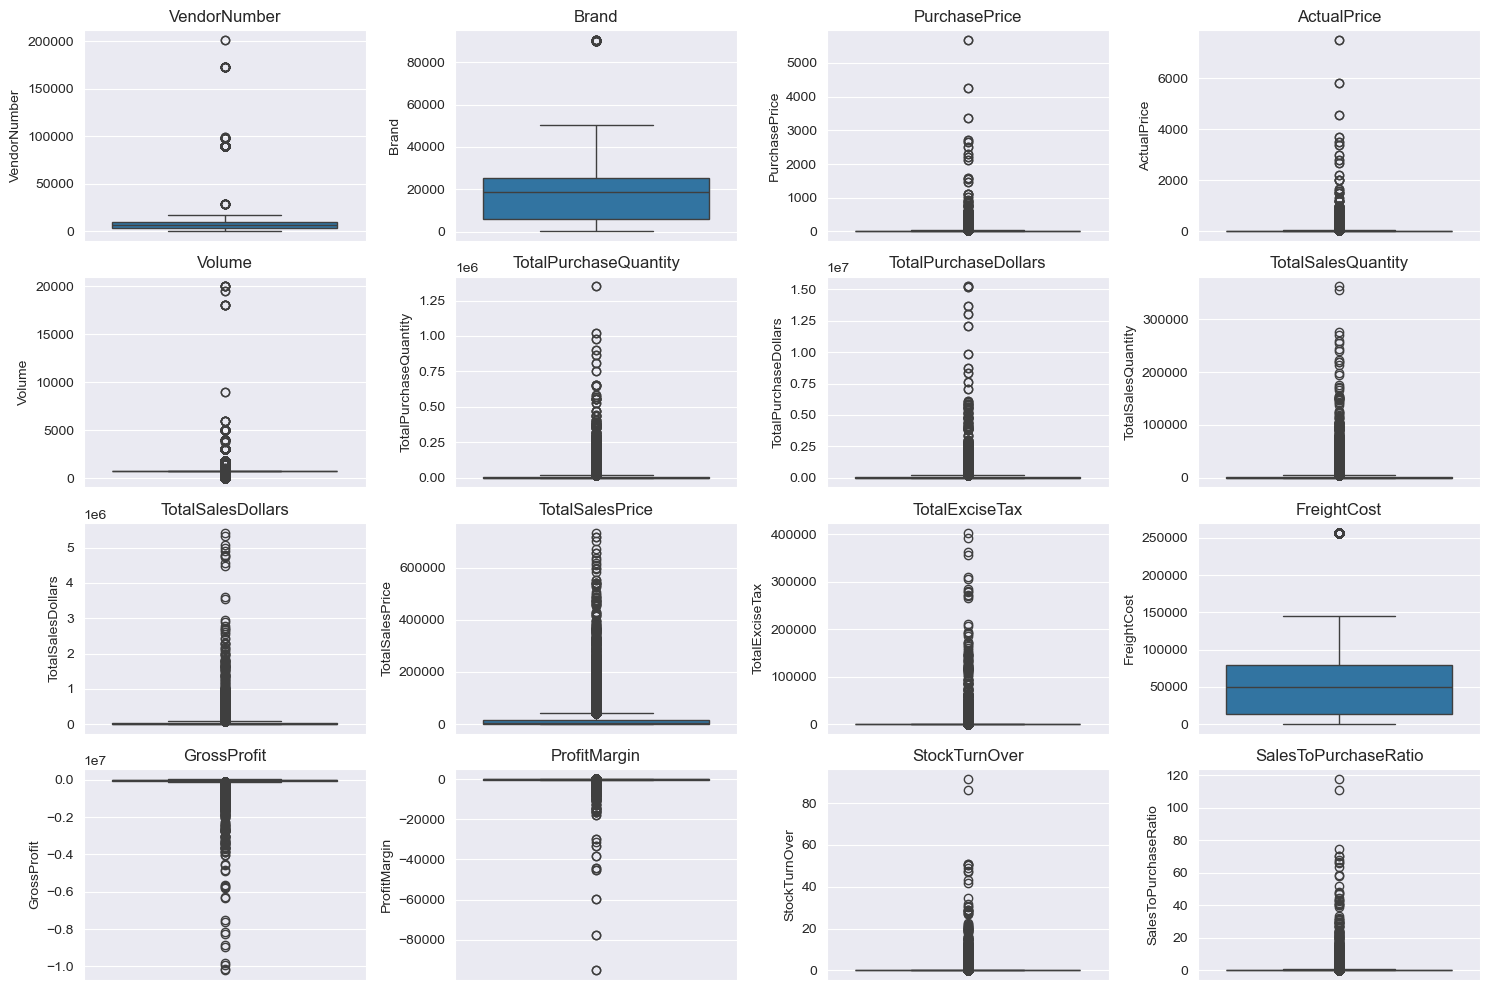

In [55]:
plt.figure(figsize=(15,10))
for i , col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)#Adjust grid layout as needed
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Summary Statistics Insights
## Negative & Zero Values:

- Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.
- Profit Margin: Has a minimum of -00, which suggests cases where revenue is zero or even lower than costs.
- Total Sales Quantity & Sales Dollars: Minimum values are O, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock
## Outliers Indicated by High Standard Deviations:
- Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products
- Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
- Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates th Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [56]:
#Let's filter the data by removing inconsistencies
df = pd.read_sql_query(""" SELECT *
                           FROM vendor_sales_summary
                           WHERE GrossProfit>0 AND ProfitMargin>0 AND TotalSalesQuantity>0

""",conn)

In [57]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnOver,SalesToPurchaseRatio
0,10754,PERFECTA WINES,2208,WhistlePig 10 Yr Old Rye,53.95,74.99,750.0,2020,108979.00,1872.0,137396.28,76669.65,1475.07,28720.52,28417.28,20.682714,0.926733,1.260759
1,1485,CASTLE BRANDS CORP.,4639,Jeffersons Ocean Bourbon,58.82,79.99,750.0,1040,61172.80,852.0,68151.48,39035.12,671.61,8497.59,6978.68,10.239954,0.819231,1.114081
2,480,BACARDI USA INC,4881,Bacardi Twin Pack 2/750mls,14.81,19.99,750.0,3384,50117.04,4036.0,79767.64,29988.89,3179.76,89286.27,29650.60,37.171214,1.192671,1.591627
3,9165,ULTRA BEVERAGE COMPANY LLP,24379,Madison's Ranch Cab Svgn,8.78,12.99,750.0,5436,47728.08,3781.0,49115.19,12132.66,423.91,68054.70,1387.11,2.824198,0.695548,1.029063
4,4425,MARTIGNETTI COMPANIES,21254,Renwood Timberline Znfdl,14.28,21.99,750.0,3252,46438.56,2263.0,49763.37,24980.64,251.88,144929.24,3324.81,6.681240,0.695879,1.071596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,1.99,50.0,8,11.36,26.0,51.74,7.96,1.36,257032.07,40.38,78.044066,3.250000,4.554577
1987,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,8,10.56,8.0,21.92,16.93,0.88,27100.41,11.36,51.824818,1.000000,2.075758
1988,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,24,9.36,262.0,128.38,2.45,13.76,50293.62,119.02,92.709145,10.916667,13.715812
1989,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,4,5.88,78.0,155.22,85.57,16.38,257032.07,149.34,96.211828,19.500000,26.397959


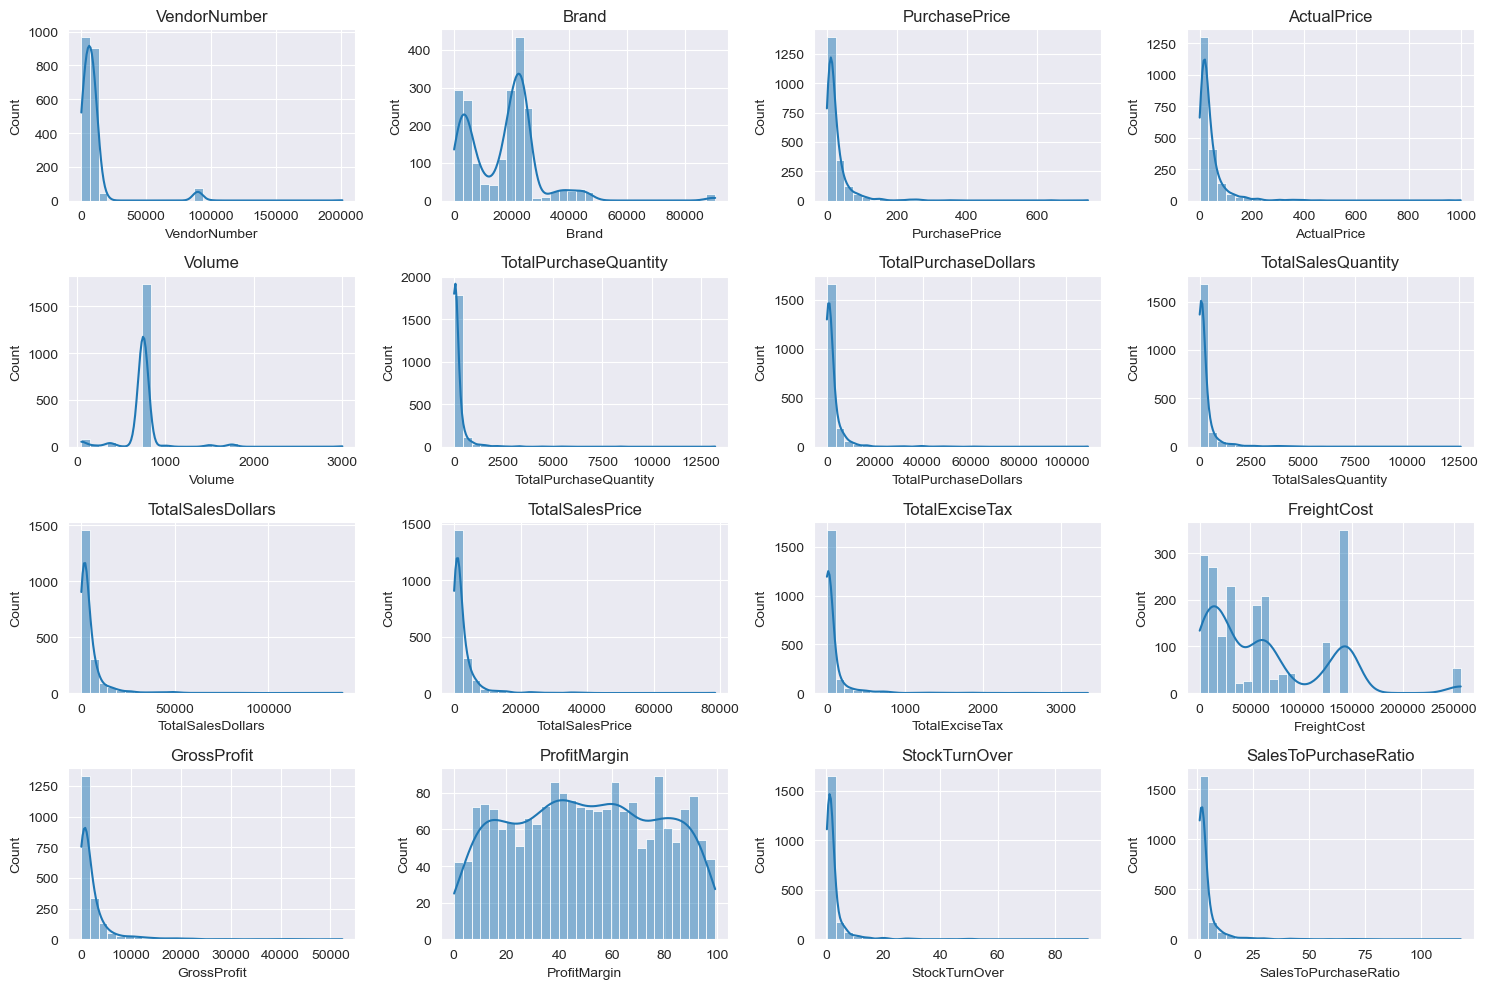

In [8]:
#Check Again
numerical_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15,10))
for i , col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)#Adjust grid layout as needed
    sns.histplot(df[col],bins=30,kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

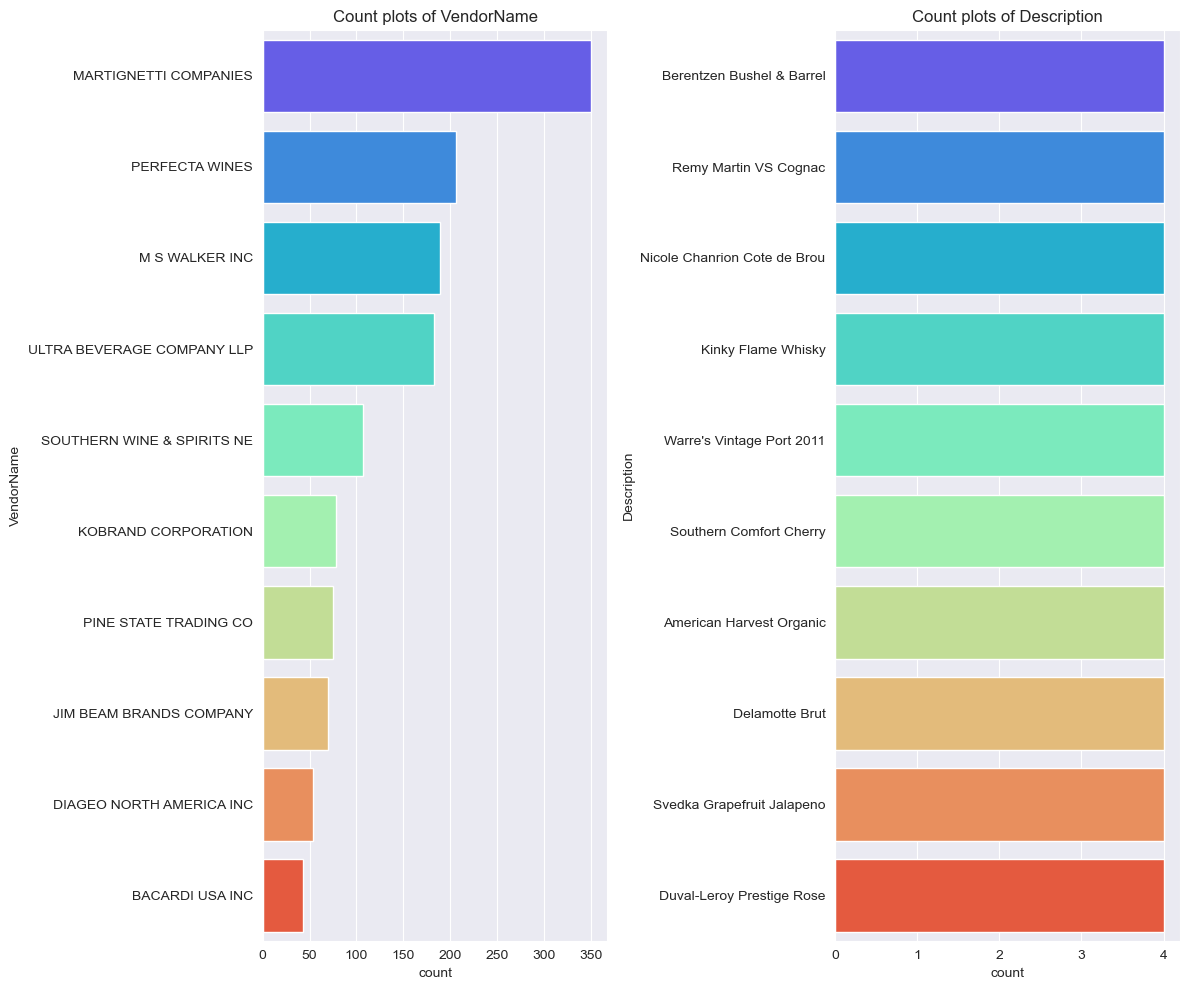

In [9]:
#Count Plots for Categorical Columns
categorical_cols = ["VendorName","Description"]

plt.figure(figsize=(12,10))
for i , col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y = df[col],order=df[col].value_counts().index[:10],palette="rainbow") #Only for top 10 Categories
    plt.title(f"Count plots of {col}")
plt.tight_layout()
plt.show()

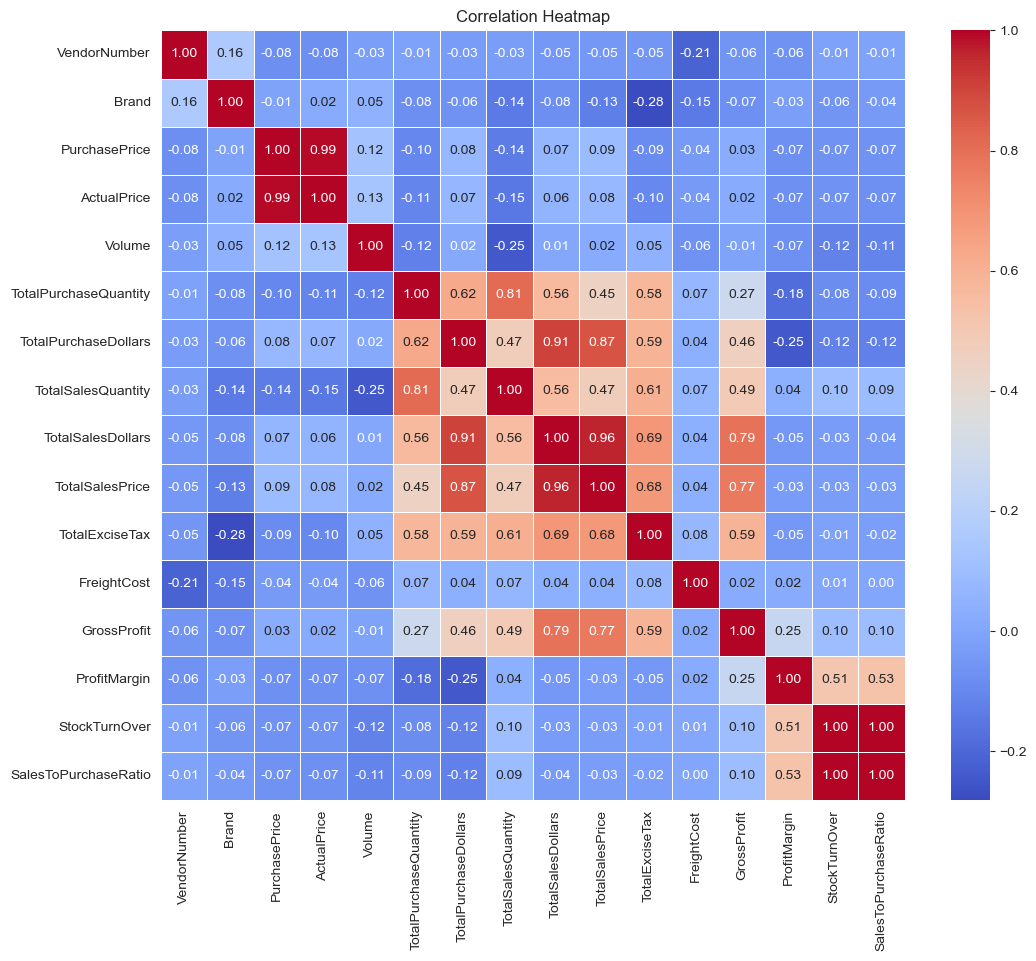

In [10]:
# Correlation of two numerical column, so use heatmap
plt.figure(figsize=(12,10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt='.2f',linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

# Correlation Insights
- PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact
- sales revenue on profit. Strong correlation between total purchase quantity and total sales quantity 10.999), confirming effic erit inventory turnover
- Negative correlation between profit margin & total sales price (40.179) suggests that as sales price increases, margins decrease, possibly due to competitive
- pricing pressures StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability

## Data Analysis

Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins

In [11]:
df['Brand']

0        2208
1        4639
2        4881
3       24379
4       21254
        ...  
1986     2626
1987     8527
1988     5683
1989     6127
1990     3065
Name: Brand, Length: 1991, dtype: int64

In [12]:
brand_performance =df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,12 Days of Pearls Gift Set,949.05,93.686669
1,1800 Select Silver Tequila,4798.40,62.532511
2,20 Mile 09 Brdx Superior,4048.92,37.459165
3,4 Orange Vodka,1121.49,50.416333
4,A Bichot Adelie Mercury,917.73,0.580781
...,...,...,...
999,Zenato Lugana Brut,1399.54,10.965031
1000,Zerran Tinto Montsant,293.81,14.444736
1001,Zhenka Vodka 80 Proof,762.06,67.960528
1002,Zinsane Znfdl Lodi,43721.28,95.610498


In [13]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold =brand_performance['ProfitMargin'].quantile(0.85)

In [14]:
low_sales_threshold

1079.3339999999998

In [15]:
high_margin_threshold

82.3621053333226

In [16]:
#Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars']<=low_sales_threshold) &
    (brand_performance['ProfitMargin']<=high_margin_threshold)
]
print("Brand with Low sales but high Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brand with Low sales but high Margins:


,Description,TotalSalesDollars,ProfitMargin
319,Concannon Glen Ellen Wh Zin,37.87,42.808960
808,Sauza Sprklg Wild Berry Marg,55.92,28.612303
76,Basilica Amaretto,94.90,40.316122
336,Crown Royal Apple,103.48,78.044066
668,New Amsterdam Red Berry Vdka,127.92,24.828018
...,...,...,...
343,Dad's Hat Rye Whiskey,1077.78,27.406335
299,Chicken & Turkey Cotes du Rh,1078.82,15.908122
365,Dom Piquemal Cotes du Roussi,1079.28,8.027574
166,Cesari Valpo Classico,1079.28,3.235490


In [17]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']>1000]# For the better visualization
brand_performance

,Description,TotalSalesDollars,ProfitMargin
1,1800 Select Silver Tequila,4798.40,62.532511
2,20 Mile 09 Brdx Superior,4048.92,37.459165
3,4 Orange Vodka,1121.49,50.416333
5,A Bichot Ch Gris Nuits St Ge,1474.75,77.897166
6,A Bichot Chablis Vaucopins,3826.68,87.440497
...,...,...,...
996,Zanetti Prosecco Frizzante,8041.95,11.204952
998,Zenato Cresasso,4299.14,24.062952
999,Zenato Lugana Brut,1399.54,10.965031
1002,Zinsane Znfdl Lodi,43721.28,95.610498


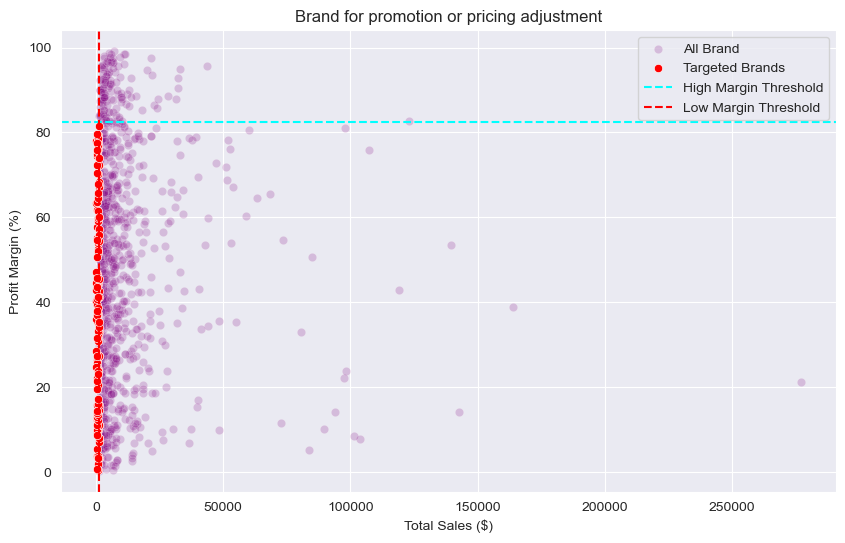

In [18]:
# Scatter Plots for data visualization
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance,x='TotalSalesDollars',y='ProfitMargin',color='purple',label='All Brand',alpha=0.2)
sns.scatterplot(data=target_brands,x='TotalSalesDollars',y='ProfitMargin',color='red',label='Targeted Brands')
plt.axhline(high_margin_threshold,linestyle='--',color='cyan',label='High Margin Threshold')
plt.axvline(low_sales_threshold, linestyle='--',color='red',label='Low Margin Threshold')

plt.xlabel('Total Sales ($)')
plt.ylabel('Profit Margin (%)')
plt.title("Brand for promotion or pricing adjustment")
plt.legend()
plt.grid(True)
plt.show()

### Which vendors and brands demonstrate highest sales perFormance ?


In [19]:
# Apply condition for the value in short format
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)


In [20]:
# Top Vendors & Brands by Sales Performance
top_vendors = df.groupby('VendorName')["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby('Description')["TotalSalesDollars"].sum().nlargest(10)

In [21]:
top_vendors

VendorName
MARTIGNETTI COMPANIES         1761204.60
ULTRA BEVERAGE COMPANY LLP    1139627.21
PERFECTA WINES                 867158.55
M S WALKER INC                 788284.69
BACARDI USA INC                555835.62
SOUTHERN WINE & SPIRITS NE     427557.14
STATE WINE & SPIRITS           344901.17
BROWN-FORMAN CORP              302748.14
JIM BEAM BRANDS COMPANY        284097.38
DIAGEO NORTH AMERICA INC       270746.88
Name: TotalSalesDollars, dtype: float64

In [22]:
top_brands

Description
WhistlePig 10 Yr Old Rye        276967.27
Bacardi Twin Pack 2/750mls      163893.10
Jeffersons  Ocean Bourbon       142622.17
DiSaronna Amaretto Sour VAP     139573.97
Jack Daniels No 7 Black Trav    122924.37
American Harvest Organic        118900.70
Dewars Highlander Honey         107266.08
Madison's Ranch Cab Svgn        103738.14
Renwood Timberline Znfdl        101549.82
Tanqueray Bloomsbury             98363.07
Name: TotalSalesDollars, dtype: float64

In [23]:
top_brands.apply(lambda x : format_dollars(x))

Description
WhistlePig 10 Yr Old Rye        276.97K
Bacardi Twin Pack 2/750mls      163.89K
Jeffersons  Ocean Bourbon       142.62K
DiSaronna Amaretto Sour VAP     139.57K
Jack Daniels No 7 Black Trav    122.92K
American Harvest Organic        118.90K
Dewars Highlander Honey         107.27K
Madison's Ranch Cab Svgn        103.74K
Renwood Timberline Znfdl        101.55K
Tanqueray Bloomsbury             98.36K
Name: TotalSalesDollars, dtype: object

In [24]:
top_vendors.apply(lambda x : format_dollars(x))

VendorName
MARTIGNETTI COMPANIES           1.76M
ULTRA BEVERAGE COMPANY LLP      1.14M
PERFECTA WINES                867.16K
M S WALKER INC                788.28K
BACARDI USA INC               555.84K
SOUTHERN WINE & SPIRITS NE    427.56K
STATE WINE & SPIRITS          344.90K
BROWN-FORMAN CORP             302.75K
JIM BEAM BRANDS COMPANY       284.10K
DIAGEO NORTH AMERICA INC      270.75K
Name: TotalSalesDollars, dtype: object

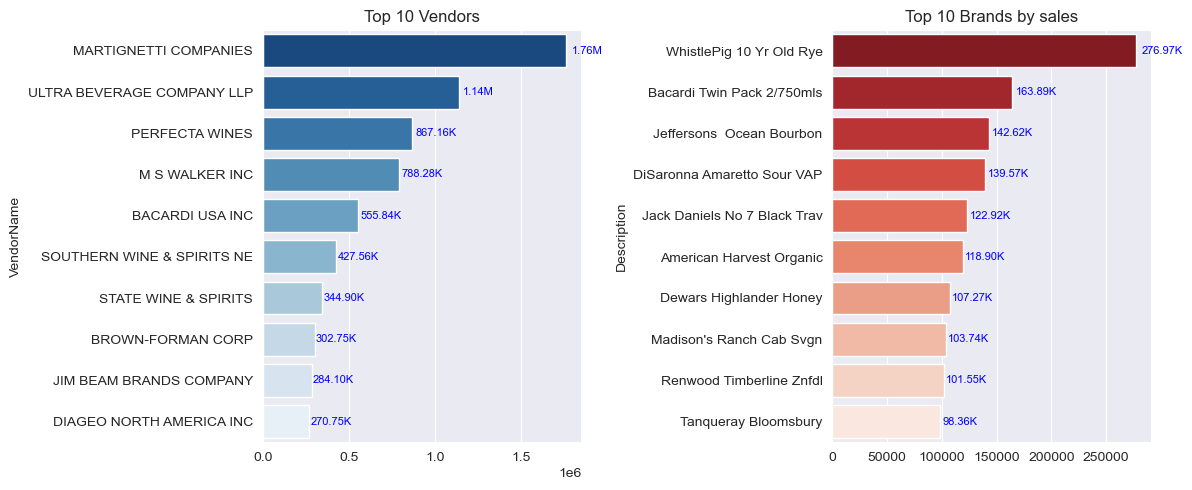

In [25]:
plt.figure(figsize = (12,5))
#plots for top vendors
plt.subplot(1,2,1)
ax1 = sns.barplot(y=top_vendors.index,x = top_vendors.values,palette="Blues_r")
plt.title("Top 10 Vendors")
for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha = 'left',va = 'center', fontsize=8,color='blue')

#plots for top  brands
plt.subplot(1,2,2)
ax2=sns.barplot(y=top_brands.index.astype(str),x=top_brands.values,palette="Reds_r")
plt.title("Top 10 Brands by sales")
for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha = 'left',va = 'center', fontsize=8,color='blue')
plt.tight_layout()
plt.show()

### Which vendors contribute the most to total purchase dollars?

In [26]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [27]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars
0,ALISA CARR BEVERAGES,71160.72,47563.03,118723.75
1,ATLANTIC IMPORTING COMPANY,25845.44,4824.12,30669.56
2,BACARDI USA INC,265027.96,290807.66,555835.62
3,BANFI PRODUCTS CORP,6677.20,6393.25,13070.45
4,BROWN-FORMAN CORP,103576.24,199171.90,302748.14
...,...,...,...,...
67,VINILANDIA USA,28055.28,58704.84,86760.12
68,VRANKEN AMERICA,54762.16,13245.05,68007.21
69,WESTERN SPIRITS BEVERAGE CO,22376.56,7392.80,29769.36
70,WILLIAM GRANT & SONS INC,19154.72,21571.10,40725.82


In [28]:
# Find the purchase of contribution
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
0,ALISA CARR BEVERAGES,71160.72,47563.03,118723.75,1.393021
1,ATLANTIC IMPORTING COMPANY,25845.44,4824.12,30669.56,0.505942
2,BACARDI USA INC,265027.96,290807.66,555835.62,5.188106
3,BANFI PRODUCTS CORP,6677.20,6393.25,13070.45,0.130711
4,BROWN-FORMAN CORP,103576.24,199171.90,302748.14,2.027577
...,...,...,...,...,...
67,VINILANDIA USA,28055.28,58704.84,86760.12,0.549202
68,VRANKEN AMERICA,54762.16,13245.05,68007.21,1.072007
69,WESTERN SPIRITS BEVERAGE CO,22376.56,7392.80,29769.36,0.438037
70,WILLIAM GRANT & SONS INC,19154.72,21571.10,40725.82,0.374967


In [29]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)

In [30]:
# Display top 10 vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)

In [31]:
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
32,MARTIGNETTI COMPANIES,932.71K,828.49K,1.76M,18.26
64,ULTRA BEVERAGE COMPANY LLP,586.29K,553.33K,1.14M,11.48
41,PERFECTA WINES,519.49K,347.67K,867.16K,10.17
30,M S WALKER INC,346.98K,441.30K,788.28K,6.79
2,BACARDI USA INC,265.03K,290.81K,555.84K,5.19
56,STATE WINE & SPIRITS,204.99K,139.91K,344.90K,4.01
13,DIAGEO NORTH AMERICA INC,191.99K,78.75K,270.75K,3.76
24,JIM BEAM BRANDS COMPANY,168.38K,115.72K,284.10K,3.30
54,SOUTHERN WINE & SPIRITS NE,167.19K,260.37K,427.56K,3.27
7,CASTLE BRANDS CORP.,142.11K,31.60K,173.71K,2.78


In [32]:
 top_vendors['PurchaseContribution%'].sum()

69.01

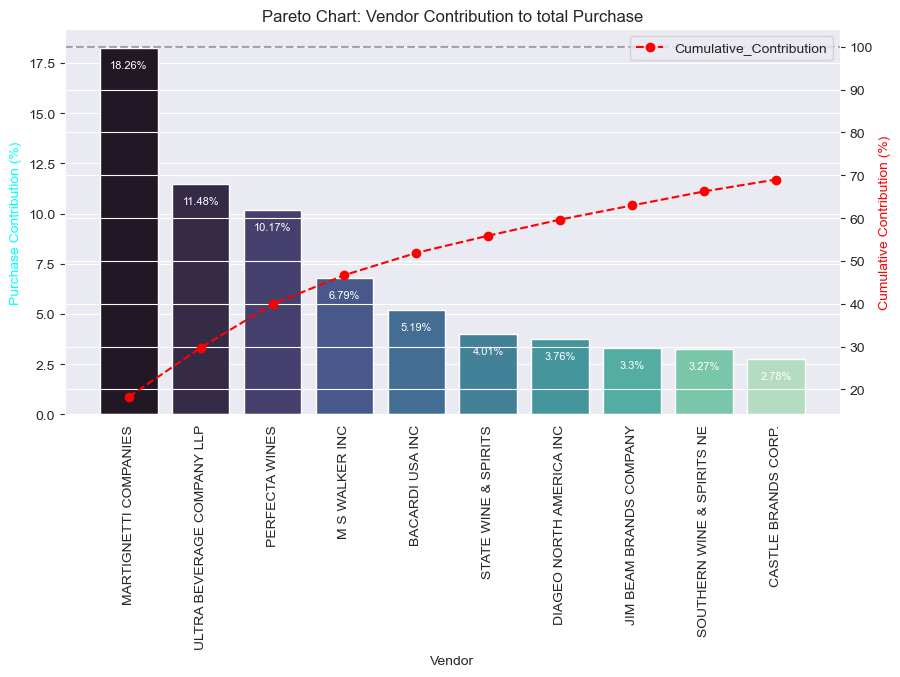

In [33]:
top_vendors['Cumulative_Contribution%']=top_vendors['PurchaseContribution%'].cumsum()
fig,ax1 = plt.subplots(figsize=(10,5))

#bar plot for purchase contribution%
sns.barplot(x=top_vendors['VendorName'],y=top_vendors['PurchaseContribution%'], palette='mako', ax=ax1)

for i , value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i,value-1, str(value)+'%',ha='center',fontsize=8,color='white')

#Line Plot for cumulative contribution
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'],top_vendors['Cumulative_Contribution%'],color='red', marker='o',linestyle='dashed',label='Cumulative_Contribution')

ax1.set_xticklabels(top_vendors['VendorName'],rotation=90)
ax1.set_ylabel('Purchase Contribution (%)',color='cyan')
ax2.set_ylabel('Cumulative Contribution (%)',color='red')
ax1.set_xlabel('Vendor')
ax1.set_title('Pareto Chart: Vendor Contribution to total Purchase')

ax2.axhline(y=100, c='gray', linestyle='dashed',alpha=0.7)
ax2.legend(loc='upper right')
plt.show()

### How much of total procurement is dependant on the top vendors?


In [34]:
print(f"Total Purchase Contribution of top vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}% ")

Total Purchase Contribution of top vendors is 69.01% 


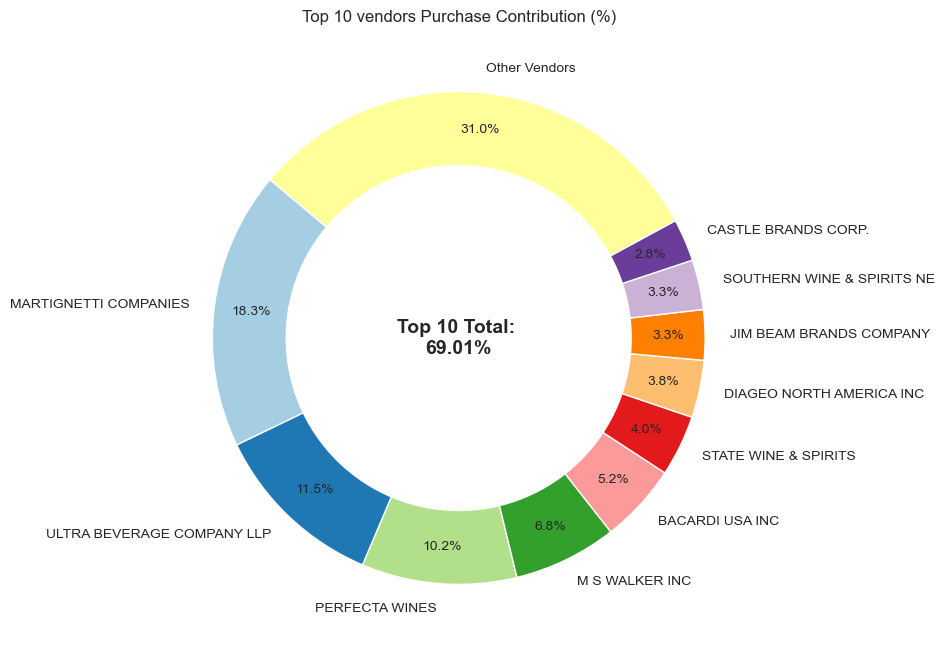

In [35]:
vendor = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100-total_contribution

#Append "Other Vendors " category
vendor.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

#Donut Chart
fig,ax = plt.subplots(figsize=(8,8))
wedges,texts, autotexts = ax.pie(purchase_contributions,labels=vendor,autopct='%1.1f%%',startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
center_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

#Add Total Contribution annotation in the center
plt.text(0,0,f"Top 10 Total: \n{total_contribution:.2f}%",fontsize=14,fontweight='bold', ha = 'center',va = 'center')

plt.title("Top 10 vendors Purchase Contribution (%)")
plt.show()


### Does purchasing in bulk reduce the unit price ,and what is the optimal purchase volume for the cost savings?

In [36]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [37]:
df['OrderSize']=pd.qcut(df['TotalPurchaseQuantity'],q=3, labels=['Small','Medium','Large'])

In [38]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,42.949303
Medium,24.917843
Large,12.941210


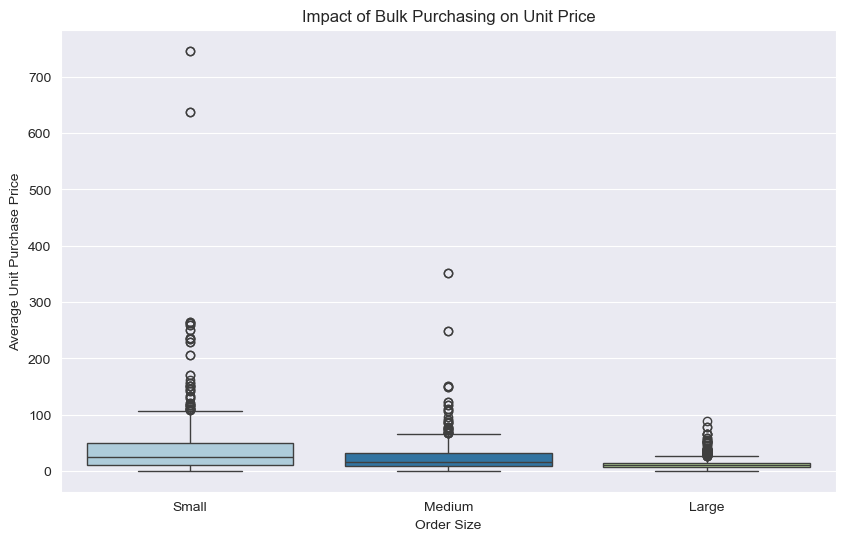

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(data= df, x = 'OrderSize', y = 'UnitPurchasePrice',palette='Paired')
plt.title('Impact of Bulk Purchasing on Unit Price')
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

- Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
- The price difference between Small and Large orders is substantial (72% reduction in unit cost).
- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

### Which vendors have low inventory turnover, indicating slow-moving products?

In [40]:
df[df['StockTurnOver']<1].groupby('VendorName')[['StockTurnOver']].mean().sort_values('StockTurnOver',ascending=True).head(10)

,StockTurnOver
VendorName,
Circa Wines,0.577206
DIAGEO CHATEAU ESTATE WINES,0.622881
WESTERN SPIRITS BEVERAGE CO,0.676348
BANFI PRODUCTS CORP,0.687500
TRINCHERO FAMILY ESTATES,0.696157
SURVILLE ENTERPRISES CORP,0.702381
LABELLE VYDS AND WINERY,0.706571
CRUSH WINES,0.721949
TREASURY WINE ESTATES,0.744810


### How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?

In [41]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity'])*df['PurchasePrice']
print('Total Unsold Capital:', format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital: -1629035.21


In [42]:
#Aggregation capital locked per vendor
inventory_value_per_vendor = df.groupby('VendorName')["UnsoldInventoryValue"].sum().reset_index()

#Sort vendors the locked per verdor
inventory_value_per_vendor=inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue']=inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
7,CASTLE BRANDS CORP.,14.61K
68,VRANKEN AMERICA,11.05K
36,MOET HENNESSY USA INC,9.19K
27,LABELLE VYDS AND WINERY,7.10K
69,WESTERN SPIRITS BEVERAGE CO,3.75K
43,PHILLIPS PRODUCTS CO.,3.25K
1,ATLANTIC IMPORTING COMPANY,2.94K
63,TRINCHERO FAMILY ESTATES,2.67K
47,R.P.IMPORTS INC,2.37K
62,TREASURY WINE ESTATES,2.04K


### What is the 95% confidence intervals for profit margins of top-performance and low-performance vendors.


In [43]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [44]:
top_vendor = df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendor = df[df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()

In [45]:
top_vendor

0       20.682714
1       10.239954
2       37.171214
3        2.824198
4        6.681240
          ...    
1660    92.921878
1774    97.678425
1807    96.306714
1911    98.424297
1916    98.505724
Name: ProfitMargin, Length: 498, dtype: float64

In [46]:
low_vendor

472      5.822006
483      1.948948
492     12.776524
498     13.678736
499      8.170138
          ...    
1986    78.044066
1987    51.824818
1988    92.709145
1989    96.211828
1990    98.282223
Name: ProfitMargin, Length: 499, dtype: float64

In [47]:
def confidence_interval(data, confident = 0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))
    t_critical = stats.t.ppf((1 + confident) / 2, df =len(data) - 1)
    margin_of_error = t_critical*std_err
    return mean_val, mean_val-margin_of_error, mean_val + margin_of_error

Top Vendor 95% CI:(46.15, 50.83),Mean: 48.49
Low Vendor 95% CI:(45.34, 50.15),Mean: 47.75


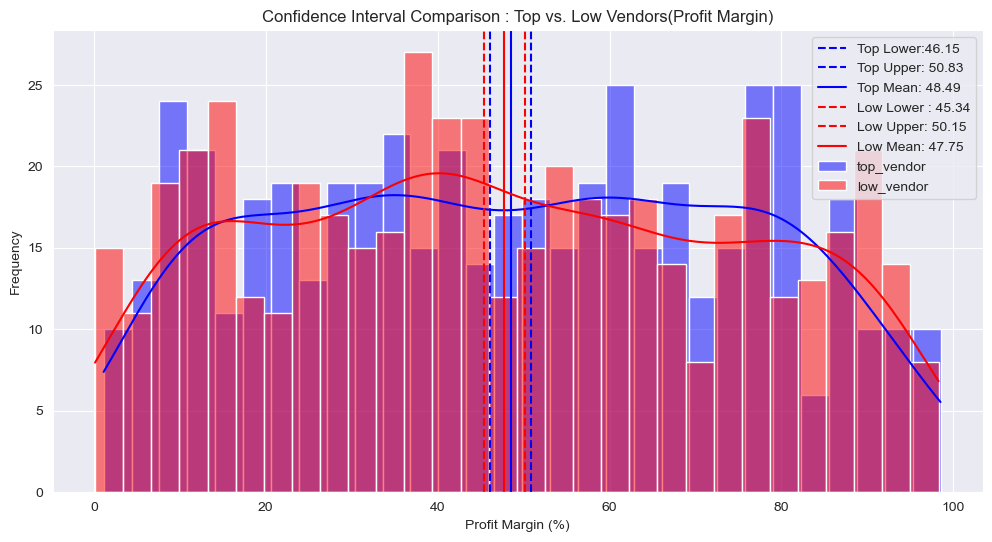

In [48]:
top_mean,top_lower,top_upper = confidence_interval(top_vendor)
low_mean, low_lower, low_upper = confidence_interval(low_vendor)

print(f"Top Vendor 95% CI:({top_lower:.2f}, {top_upper:.2f}),Mean: {top_mean:.2f}")
print(f"Low Vendor 95% CI:({low_lower:.2f}, {low_upper:.2f}),Mean: {low_mean:.2f}")

plt.figure(figsize=(12,6))

#Top Vendors Plot
sns.histplot(top_vendor,kde=True,color='blue', bins=30, alpha=0.5, label='top_vendor')
plt.axvline(top_lower, color='blue', linestyle='--',label = f"Top Lower:{top_lower:.2f}")
plt.axvline(top_upper, color='blue', linestyle='--', label = f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean,color = 'blue', linestyle = '-', label = f"Top Mean: { top_mean:.2f}")

#Low Vendor Plot
sns.histplot(low_vendor,kde= True,color='red', bins=30, alpha=0.5, label='low_vendor')
plt.axvline(low_lower, color = 'red', linestyle = '--', label = f"Low Lower : {low_lower:.2f}")
plt.axvline(low_upper, color='red',linestyle = '--',label = f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean,color='red', linestyle= '-', label=f"Low Mean: {low_mean:.2f}")

#Finalize plot
plt.title("Confidence Interval Comparison : Top vs. Low Vendors(Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

- The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).
- This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
- For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.
- For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

### Is there a significant difference in profit margins between top-performing and low-performing vendors?

Hypothesis:
<br> H⁰ (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low-performing vendors.
 <br> H¹ (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different

In [49]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)


top_vendor= df[df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_vendor= df[df['TotalSalesDollars'] <= top_threshold]['ProfitMargin'].dropna()

#Perform Two-Smple T-test
t_stat, p_value = ttest_ind(top_vendor, low_vendor,equal_var=False)

#print Results
print(f"T-Static: {t_stat:.4f}, {p_value:.4f}")
if p_value < 0.5:
    print("Reject H৹: There is a significant difference in profit margins between top and low-performance vendors.")
else:
    print("Fall to Reject H৹: No significant difference in profit margins.")

T-Static: -1.4215, 0.1555
Reject H৹: There is a significant difference in profit margins between top and low-performance vendors.


In [50]:
df.to_csv("vendor_summary.csv")